# Regularized Linear Models

In [ ]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..", "src")))
import helpers

import importlib
importlib.reload(helpers)

import numpy as np
import matplotlib.pyplot as plt

<module 'helpers' from '/Users/boris.tsarev/MyProjects/ai-explore/src/helpers.py'>

To **regularize** - to constrain.
- For polynomial regression - reduce the number of polynomial degrees 
- For linear - constrain weights of the model

## Ridge Regression

Include regularization term in the cost function

$\frac{\alpha}{m} \sum_{i=1}^{n} \theta_i^2$

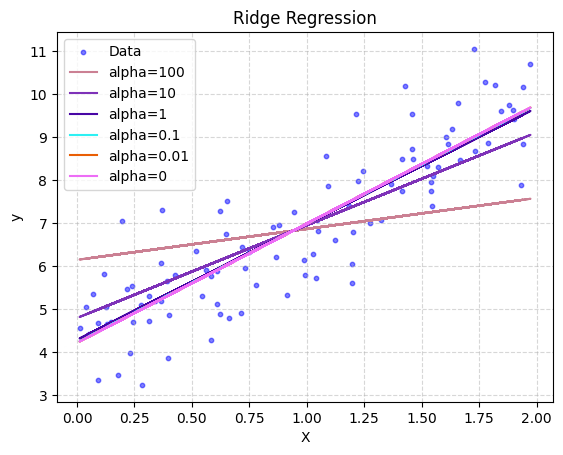

In [ ]:
from sklearn.linear_model import Ridge

X, y = helpers.generate_linear_data()
helpers.prepare_plot_data(X, y, title="Ridge Regression")

def ridge_regression_plot(alpha):
    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_reg.fit(X, y)
    y_pred = ridge_reg.predict(X)

    # use random color for each alpha
    plt.plot(X, y_pred, color=np.random.rand(3,), label=f"alpha={alpha}")

for alpha in [100, 10, 1, 0.1, 0.01, 0]:
    ridge_regression_plot(alpha)

plt.legend()
plt.show()